# R Graphics Exercise

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
df <- read_tsv('data/gene_counts.txt')

Parsed with column specification:
cols(
  .default = col_integer(),
  person = col_character(),
  method = col_character(),
  Label = col_character(),
  Media = col_character(),
  Strain = col_character()
)
See spec(...) for full column specifications.


In [3]:
df[1:10, 1:10]

sid,person,method,Label,Media,Strain,gene0,gene1,gene10,gene100
1,J,MA,1_MA_J,YPD,H99,1,0,13,425
1,J,RZ,1_RZ_J,YPD,H99,0,0,14,261
2,C,MA,2_MA_C,YPD,H99,0,0,10,491
2,C,RZ,2_RZ_C,YPD,H99,10,0,18,251
2,C,TOT,2_TOT_C,YPD,H99,1,0,0,14
3,J,MA,3_MA_J,YPD,H99,0,0,8,280
3,J,RZ,3_RZ_J,YPD,H99,0,0,7,168
3,J,TOT,3_TOT_J,YPD,H99,0,0,2,35
4,P,MA,4_MA_P,YPD,H99,1,0,16,571
4,P,RZ,4_RZ_P,YPD,H99,0,0,1,74


In [4]:
options(repr.plot.width=4, repr.plot.height=3)

**1**. Plot a scatter plot of gene100 against gene 1001. Color points by the method used. Save the image as a PNG file 'fig1.png' in the 'figs' folder.

Saving 6.67 x 6.67 in image


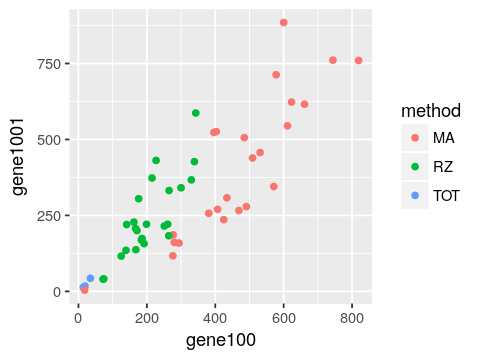

In [13]:
ggplot(df, aes(x=gene100, y=gene1001, color=method)) + 
geom_point()
ggsave('figs/fig1.png')

**2**. Make a boxplot plot of gene100 counts by method.

Saving 6.67 x 6.67 in image


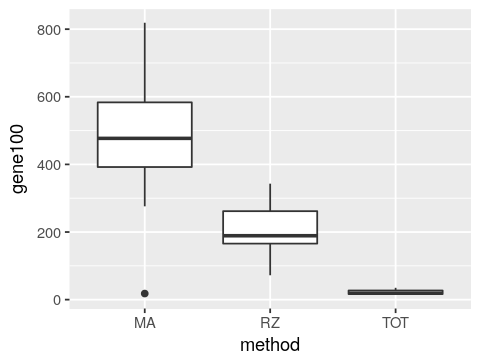

In [14]:
ggplot(df, aes(x=method, y=gene100)) +
geom_boxplot()
ggsave('figs/fig2.png')

**3**. Make a jitter plot of gene100 counts by Media and color the points by method. Set the jitter width to be 0.2.

Saving 6.67 x 6.67 in image


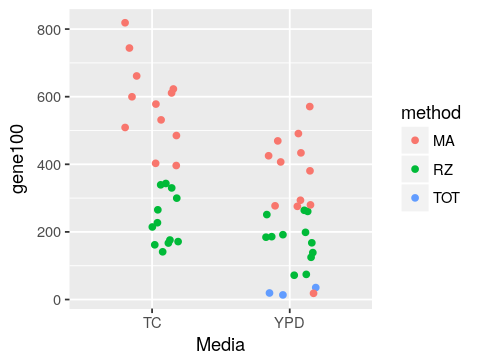

In [15]:
ggplot(df, aes(x=Media, y=gene100, color=method)) +
geom_jitter(width=0.2)
ggsave('figs/fig3.png')

**4**. Make a grid of histograms of counts for gene100, with rows showing the person and columns showing the method used.

Saving 6.67 x 6.67 in image


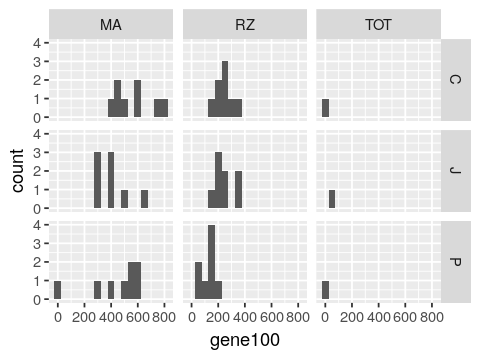

In [16]:
ggplot(df, aes(x=gene100)) +
facet_grid(person ~ method) +
geom_histogram(binwidth=50) 
ggsave('figs/fig4.png')

**5**. Make a row of boxplots of log counts of the top 5 genes where each colum shows a differnt method.

**Warning**: This is  difficult and involves quite a bit of data processing.

In [9]:
genes.top5 <- df %>% 
select(starts_with('gene')) %>% 
summarize_all(mean) %>% 
gather() %>% 
arrange(desc(value)) %>%
head(5)

In [10]:
genes.top5

key,value
gene1139,884531.49
gene1136,484816.47
gene7418,132744.71
gene363,62325.08
gene7387,45986.86


In [11]:
genes.top5$key

[1] "gene1139" "gene1136" "gene7418" "gene363"  "gene7387"

Saving 6.67 x 6.67 in image


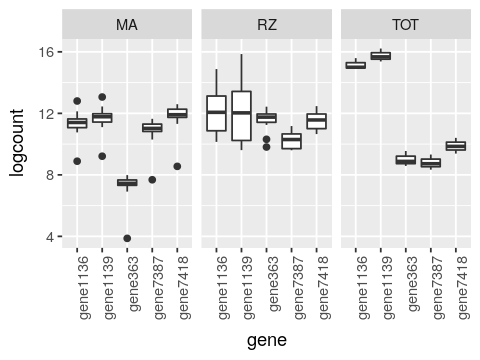

In [17]:
df %>% 
select(c('method', genes.top5$key)) %>%
gather(gene, count, -method) %>%
mutate(logcount = log(count)) %>%
ggplot(aes(x=gene, y=logcount)) +
geom_boxplot() + 
facet_wrap(~ method) +
theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave('figs/fig5.png')